# The Movies Dataset

* Data source: The movies database, for ~45K movies in movielens data
* Data + kernel on kaggle datasets:  https://www.kaggle.com/rounakbanik/the-movies-dataset
       

This notebook is about my first data science for Movies dataset from Kaggle using Clustering Kmeans algorithm.

# Data Description
The content of the data is as following:
* movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

* keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

* credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

* links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.


The Movie Links and Ratings have been obtained from the Official GroupLens website. The files are a part of the dataset available here: https://grouplens.org/datasets/movielens/latest/

In [87]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #import visualization tools
import seaborn as sns  # import seaborn visualization tool
import pylab as pl
import os # accessing directory structure

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [88]:
pwd

'C:\\Users\\mosta\\Desktop'

In [92]:
df = pd.read_csv(r'C:\Users\mosta\Desktop\movies_metadata.csv')

C:\Users\mosta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [93]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [94]:
df[["id","imdb_id"]].dtypes

id         object
imdb_id    object
dtype: object

In [95]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [96]:
df.shape

(45466, 24)

In [97]:
df.dropna(subset=["imdb_id"]).shape

(45449, 24)

In [98]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [99]:
df.corr()

,revenue,runtime,vote_average,vote_count
revenue,1.000000,0.103917,0.083868,0.812022
runtime,0.103917,1.000000,0.158146,0.113539
vote_average,0.083868,0.158146,1.000000,0.123607
vote_count,0.812022,0.113539,0.123607,1.000000


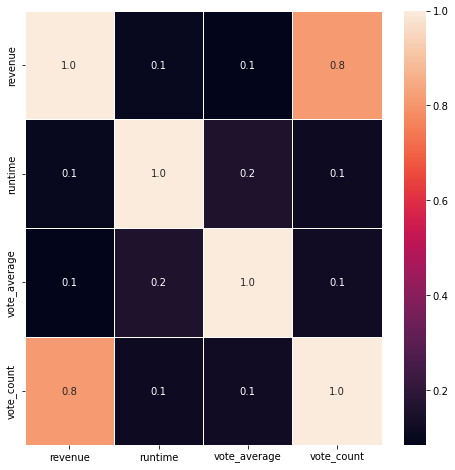

In [100]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [101]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

In [102]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [103]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [104]:
df_numeric['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [105]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      39.00
0.78      43.00
0.79      46.00
0.80      50.00
0.81      54.00
0.82      60.00
0.83      66.00
0.84      73.00
0.85      82.00
0.86      91.00
0.87     104.00
0.88     118.00
0.89     138.00
0.90     160.00
0.91     192.00
0.92     228.00
0.93     281.00
0.94     346.00
0.95     434.00
0.96     576.64
0.97     821.23
0.98    1236.82
0.99    2183.82
Name: vote_count, dtype: float64

In [106]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [107]:
df_numeric.shape

(12182, 7)

# Normalize Data

In [108]:
from sklearn import preprocessing

In [109]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [110]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [111]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


# Apply K-Means Clustering

In [146]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [147]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

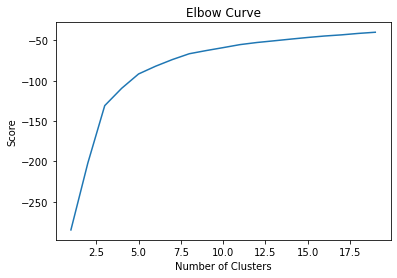

In [148]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Fit K-Means clustering for k=5

In [149]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5)

In [150]:
len(kmeans.labels_)

12178

In [151]:
df_numeric['cluster'] = kmeans.labels_

In [152]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,2
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,4
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,3
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,3
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,3


In [154]:
df_numeric.dropna(inplace=True)

In [155]:
df_numeric['vote_count'].describe()

count    12178.000000
mean       388.336591
std        891.671853
min         31.000000
25%         50.000000
50%         99.000000
75%        299.000000
max      14075.000000
Name: vote_count, dtype: float64

In [156]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74     283.00
0.75     299.00
0.76     317.00
0.77     335.00
0.78     356.00
0.79     375.00
0.80     396.00
0.81     425.37
0.82     454.00
0.83     495.82
0.84     533.00
0.85     574.00
0.86     628.00
0.87     685.99
0.88     753.00
0.89     840.53
0.90     924.00
0.91    1021.07
0.92    1148.00
0.93    1318.83
0.94    1518.38
0.95    1730.45
0.96    2086.68
0.97    2550.00
0.98    3298.60
0.99    4732.68
Name: vote_count, dtype: float64

In [157]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [158]:
df_numeric.shape

(12178, 8)

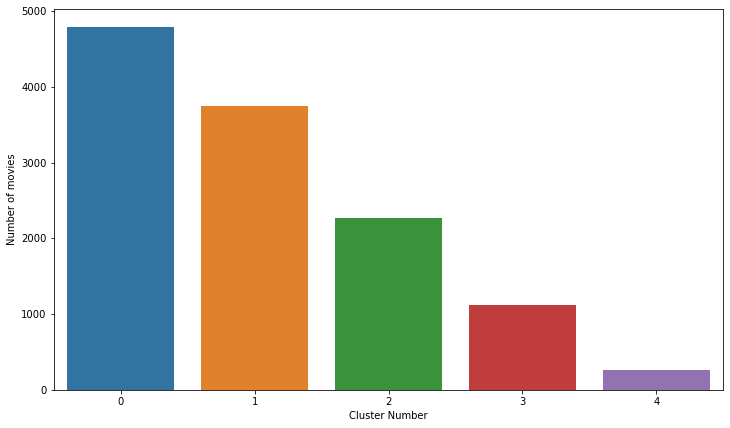

In [170]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [171]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.444018e+07,100.396364,6.188905,169.587338
1,1.687969e+07,109.901950,7.278520,304.510286
2,1.028055e+07,93.718130,4.940979,122.632554
3,1.616413e+08,114.293226,6.210784,1129.967023
4,6.288649e+08,126.146154,6.903846,4738.096154


In [172]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

In [173]:
size_array

[4786, 3743, 2267, 1122, 260]

In [174]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
21175,255000000,12.729104,8.928991e+07,149.0,5.9,2361.0,The Lone Ranger,4
19971,250000000,23.253089,1.021104e+09,169.0,7.0,8427.0,The Hobbit: An Unexpected Journey,4
30761,245000000,24.926577,8.806746e+08,148.0,6.3,4552.0,Spectre,4
13643,150000000,15.362632,3.856804e+08,127.0,7.4,4574.0,Star Trek,4
20527,195000000,11.606061,1.976876e+08,114.0,5.5,2634.0,Jack the Giant Slayer,4


In [175]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
10817,55000000,11.887779,65664721.0,105.0,6.2,675.0,16 Blocks,3
25836,70000000,14.932368,17752940.0,133.0,5.1,842.0,Blackhat,3
269,45000000,14.287753,112006296.0,123.0,6.1,272.0,Mary Shelley's Frankenstein,3
1802,71000000,9.439079,294456605.0,85.0,5.4,705.0,Doctor Dolittle,3
18723,42000000,11.250764,201585328.0,109.0,6.7,4151.0,21 Jump Street,3


In [176]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
16669,15000000,4.582024,20529194.0,117.0,5.9,80.0,Country Strong,0
12638,14100000,5.97385,0.0,107.0,5.7,191.0,The Oxford Murders,0
33704,0,4.107272,0.0,121.0,6.2,60.0,The Tower,0
1737,5000000,3.621052,1980338.0,116.0,6.0,56.0,Zero Effect,0
3357,0,7.188728,0.0,90.0,6.6,188.0,Empire Records,0
